# Data EDA

In [ ]:
#All import goes here
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import random


In [ ]:
#Read in data from Github
board = pd.read_csv("https://raw.githubusercontent.com/hangxu0324/Capstone-Project/main/data/board_anon.csv",index_col=0)
cx_df = pd.read_csv("https://raw.githubusercontent.com/hangxu0324/Capstone-Project/main/data/cx_df_anon.csv",index_col=0)
gx_df = pd.read_csv("https://raw.githubusercontent.com/hangxu0324/Capstone-Project/main/data/gx_df_anon.csv",index_col=0)
launch_df = pd.read_csv("https://raw.githubusercontent.com/hangxu0324/Capstone-Project/main/data/launch_df_anon.csv").iloc[:,2:]

In [ ]:
#Some basic transformation
board['date'] = pd.to_datetime(board['date'])

## Data description
We have a total of four datasets:

**`board`**, which is the central data. 

The following is the data dictionary for it:

`Country`- Anonymized name of the country. Each country has a different portfolio of cluster/drugs.

`Cluster` – Anonymized name of the drug. Different countries sell the same drug, and usually they are at the same Lifecycle stage (not always since different compliance rules in each country may lead to different
launch dates of the drug)

`Cluster_id` – Unique identifier corresponding to a particular country-cluster combination.

`Date` – Date of the month, always has the format DD/MM/YYYY. Since we work with monthly data, all the days will be 1 by default.

`Slope_cat` – Category of the current lifecycle stage, determined by Novartis through the combination of AI and business consensus. It can be: positive – growing trend -, neutral – stable trend - or negative – declining
trend -. For a particular Country-Cluster, a change in the slope_cat means there is a change in the Lifecycle stage.

`Volume` – Analogue to sales, computed by: Volume = Sales / Price (per drug per country). This will be the target variable to be forecasted.

`Business_unit` – Business unit, can be either ONE or TWO.

`Ther_area_fact` – Encoded therapeutic area of the drug.

`Prevalence_pct` – Ratio from -100 to 100 of number of patients taking the drug with respect to the overall
population.

In [ ]:
board

,country,cluster,cluster_id,date,stage_name,stage_name_lag_1,stage_id_cumsum,volume,business_unit,ther_area_fact,prevalence_pct
0,country_0,brand_25,ID_1,2012-01-01,PostGx_Growth,No_Stage,0.0,1.046142e+09,ONE,0,-1.0
1,country_0,brand_25,ID_1,2012-02-01,PostGx_Growth,No_Stage,0.0,5.230708e+08,ONE,0,-1.0
2,country_0,brand_25,ID_1,2012-03-01,PostGx_Growth,No_Stage,0.0,1.029536e+09,ONE,0,-1.0
3,country_0,brand_25,ID_1,2012-04-01,PostGx_Growth,No_Stage,0.0,5.479789e+08,ONE,0,-1.0
4,country_0,brand_25,ID_1,2012-05-01,PostGx_Growth,No_Stage,0.0,1.095958e+09,ONE,0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
191350,country_34,brand_138,ID_3363,2021-12-01,NaN,NaN,NaN,1.177490e+07,TWO,8,-1.0
191351,country_34,brand_138,ID_3363,2022-01-01,NaN,NaN,NaN,8.020418e+06,TWO,8,-1.0
191352,country_34,brand_138,ID_3363,2022-02-01,NaN,NaN,NaN,1.403324e+07,TWO,8,-1.0
191353,country_34,brand_138,ID_3363,2022-03-01,NaN,NaN,NaN,1.768477e+07,TWO,8,-1.0


In [ ]:
print("We have data across {} countries, of {} drugs, and {} country-drug clusters."
          .format(len(board['country'].unique()),len(board['cluster'].unique()),len(board['cluster_id'].unique())))


We have data across 43 countries, of 126 drugs, and 1865 country-drug clusters.


In [ ]:
board['ther_area_fact'].value_counts()

2     62953
1     24272
7     22788
8     19831
10    11091
6      9938
9      9337
0      8380
5      8247
4      7986
3      3160
11     3048
12      324
Name: ther_area_fact, dtype: int64

### Missing value

**For data points later than 2019/04/01, stage name related values are not given for testing purposse.**

### Visualizaitons

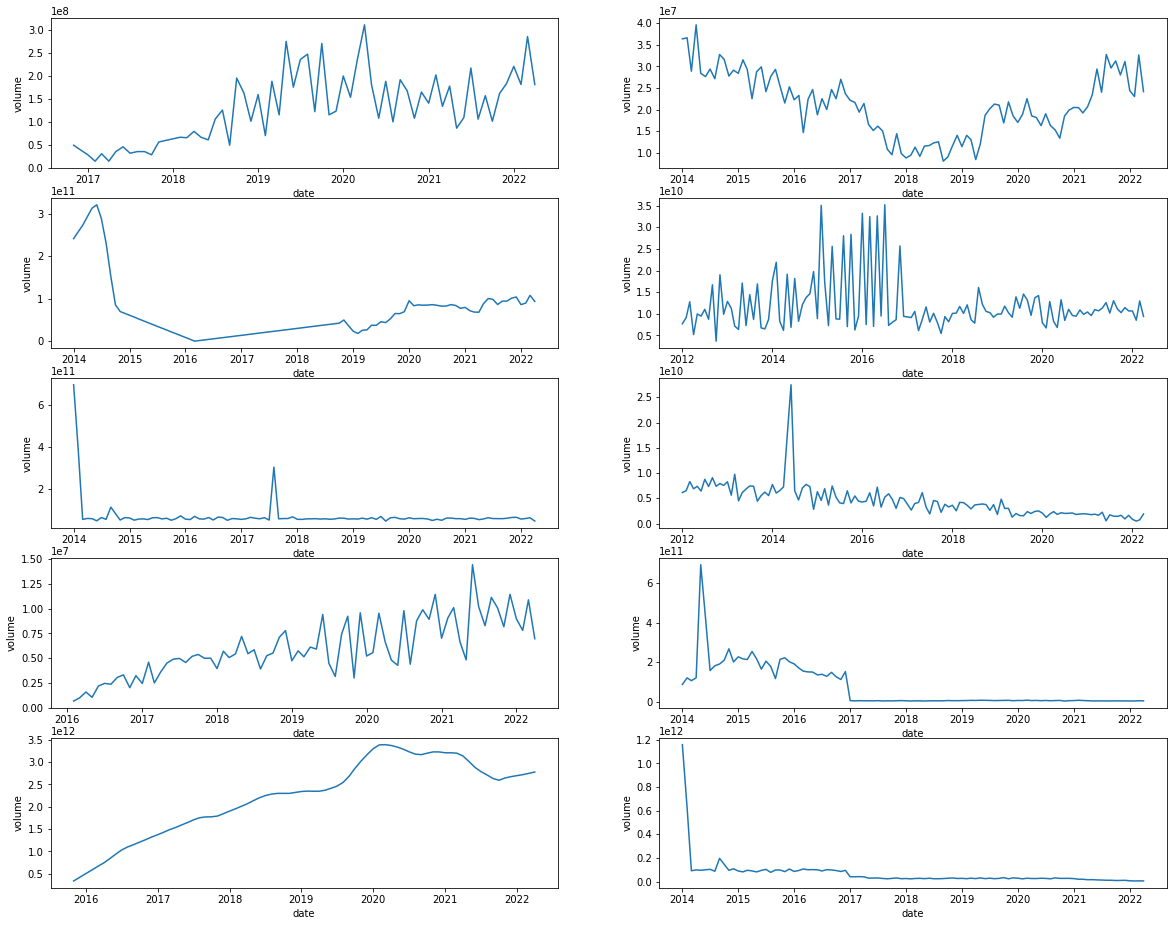

In [ ]:
# Change subplots parameter and loop to display more or less time series.

ids = board.cluster_id.unique()
fig,axes = plt.subplots(5,2,figsize=(20,16))

for i in range(10):
    rand = random.randint(0,1864)
    cluster = board[board['cluster_id']==ids[rand]].iloc[:,[3,7]]
    sns.lineplot(x='date',y='volume',data=cluster,ax=axes.flatten()[i])

#plt.axvline(x=pd.to_datetime('2012-06-01'), color='red')
#plt.axvline(x=pd.to_datetime('2014-12-01'), color='green')
#plt.axvline(x=pd.to_datetime('2017-01-01'), color='green')

In [ ]:
def data_filter(board):
  ''' 
  input: board is the dataframe from board_anon.csv
  output: board with growth to maturity clusters that have launch date after 2016
  '''
  
  # find growth to maturity cluster ids
  gtm_ids = board.query('stage_name=="Maturity" & stage_name_lag_1=="Growth"').cluster_id.unique()
  # ignore clusters with missing launch date
  gtm_launch_df = launch_df[(launch_df['cluster_id'].isin(gtm_ids))].reset_index()
  # choose clusters with launch date after 2016
  gtm_launch_df_after = gtm_launch_df[pd.DatetimeIndex(gtm_launch_df['launch_date']).year > 2006].reset_index()
  gtm_ids_after = gtm_launch_df_after.cluster_id.unique()

  return board[board['cluster_id'].isin(gtm_ids_after)]

Number of growth to maturity clusters: 463

There are 422 growth to maturity clusters with launch date.



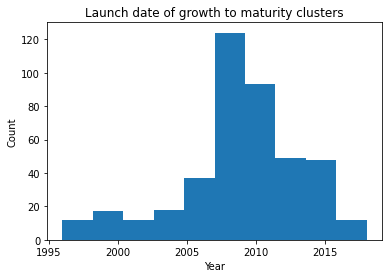

number of gtm clusters before 2006 (include 2006): 96
number of gtm clusters after 2006: 326


In [ ]:
# number of growth to maturity
gtm_ids = board.query('stage_name=="Maturity" & stage_name_lag_1=="Growth"').cluster_id.unique()
print('Number of growth to maturity clusters: {}\n'.format(len(gtm_ids)))

# lauch dates of gtm clusters
gtm_launch_df = launch_df[(launch_df['cluster_id'].isin(gtm_ids))].reset_index()
#not_miss_gtm_ids = gtm_launch_df.cluster_id.unique()
#missing_launch_date = [a for a in gtm_ids if a not in not_miss_gtm_ids]
print('There are {} growth to maturity clusters with launch date.\n'.format(len(gtm_launch_df)))

# distribution of launch date
gtm_launch_df
plt.hist(pd.DatetimeIndex(gtm_launch_df['launch_date']).year, 10, histtype ='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Launch date of growth to maturity clusters')
plt.show()

# number of launch dates seperated by 2006
gtm_launch_df_before = gtm_launch_df[pd.DatetimeIndex(gtm_launch_df['launch_date']).year <= 2006].reset_index()
gtm_ids_before = gtm_launch_df_before.cluster_id.unique()
gtm_launch_df_after = gtm_launch_df[pd.DatetimeIndex(gtm_launch_df['launch_date']).year > 2006].reset_index()
gtm_ids_after = gtm_launch_df_after.cluster_id.unique()
print('number of gtm clusters before 2006 (include 2006): {}'.format(len(gtm_ids_before)))
print('number of gtm clusters after 2006: {}'.format(len(gtm_ids_after)))

Growth: Green
Mature: blue
Decline: red
Missing: black


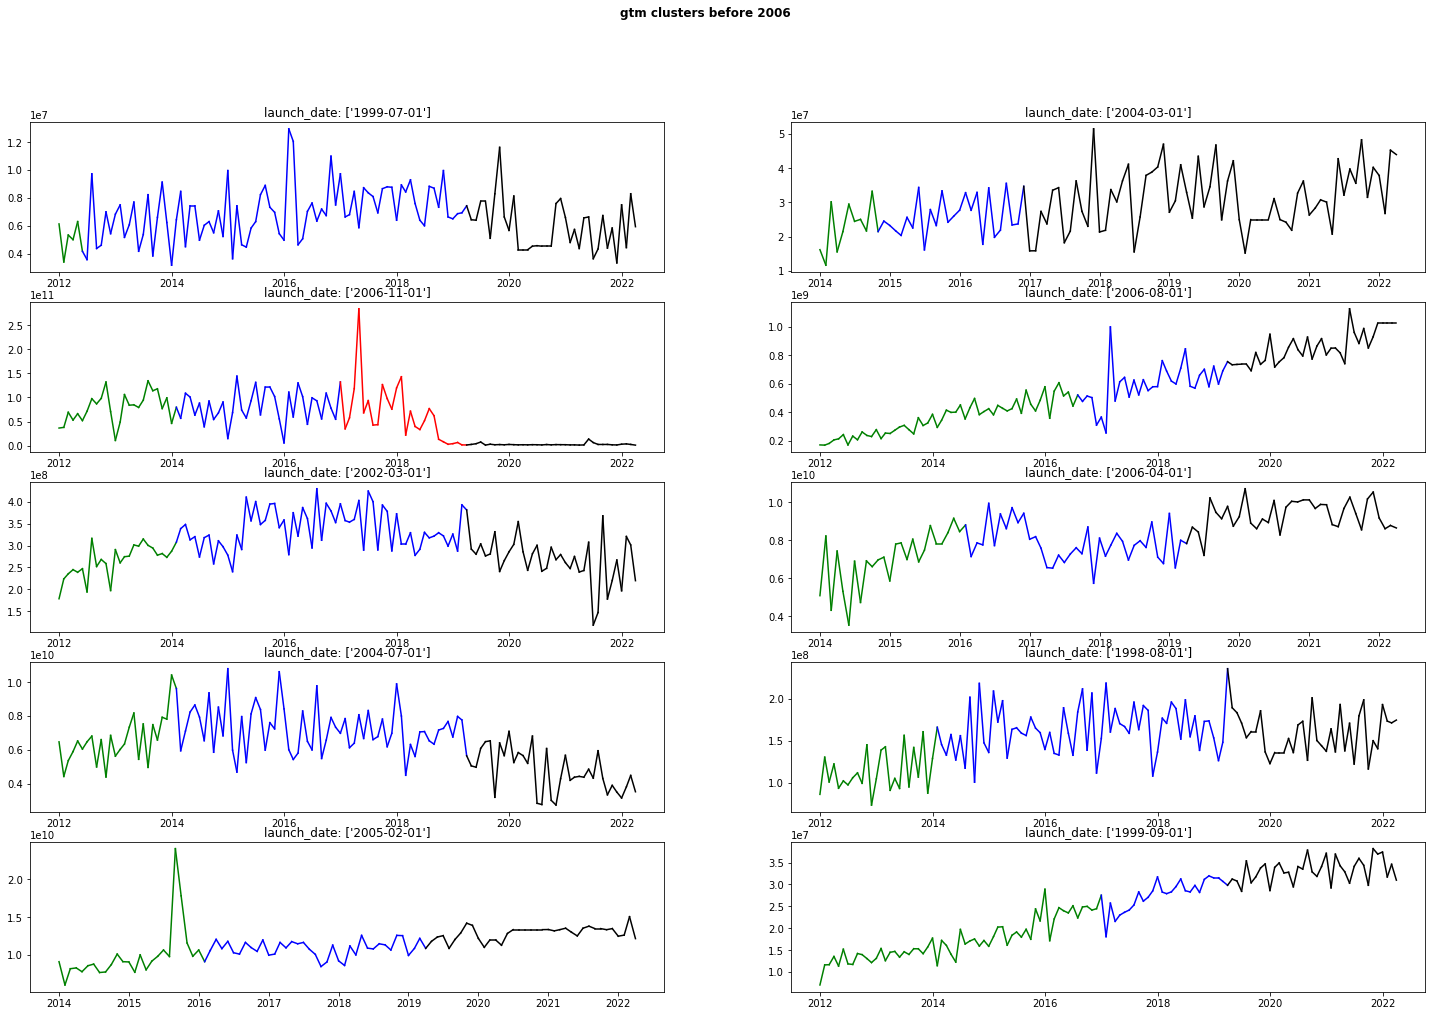

In [ ]:
fig,axes = plt.subplots(5,2,figsize=(25,16))
fig.suptitle('gtm clusters before 2006',fontweight ="bold")
print("Growth: Green")
print("Mature: blue")
print("Decline: red")
print("Missing: black")
for i in range(10):
    rand = random.randint(0,96)
    cluster = board[board['cluster_id']==gtm_ids_before[rand]].iloc[:,[3,4,7]].reset_index()

    launch_date = launch_df[launch_df['cluster_id']==gtm_ids_before[rand]].launch_date.values
    axes.flatten()[i].title.set_text(f'launch_date: {launch_date}')
    
    for idx, row in cluster.iterrows():
      if idx==len(cluster)-1:
          break    
      if row.stage_name =='Growth':
          color = 'green'
      elif row.stage_name =='Maturity':
          color = 'blue'
      elif row.stage_name =='Decline':
          color = 'red'
      else:
          color = 'black' # Stage Name missing
      sns.lineplot(x=[row.date, cluster.loc[idx + 1, 'date']], y=[row.volume, cluster.loc[idx + 1, 'volume']], color=color, ax=axes.flatten()[i])


Growth: Green
Mature: blue
Decline: red
Missing: black


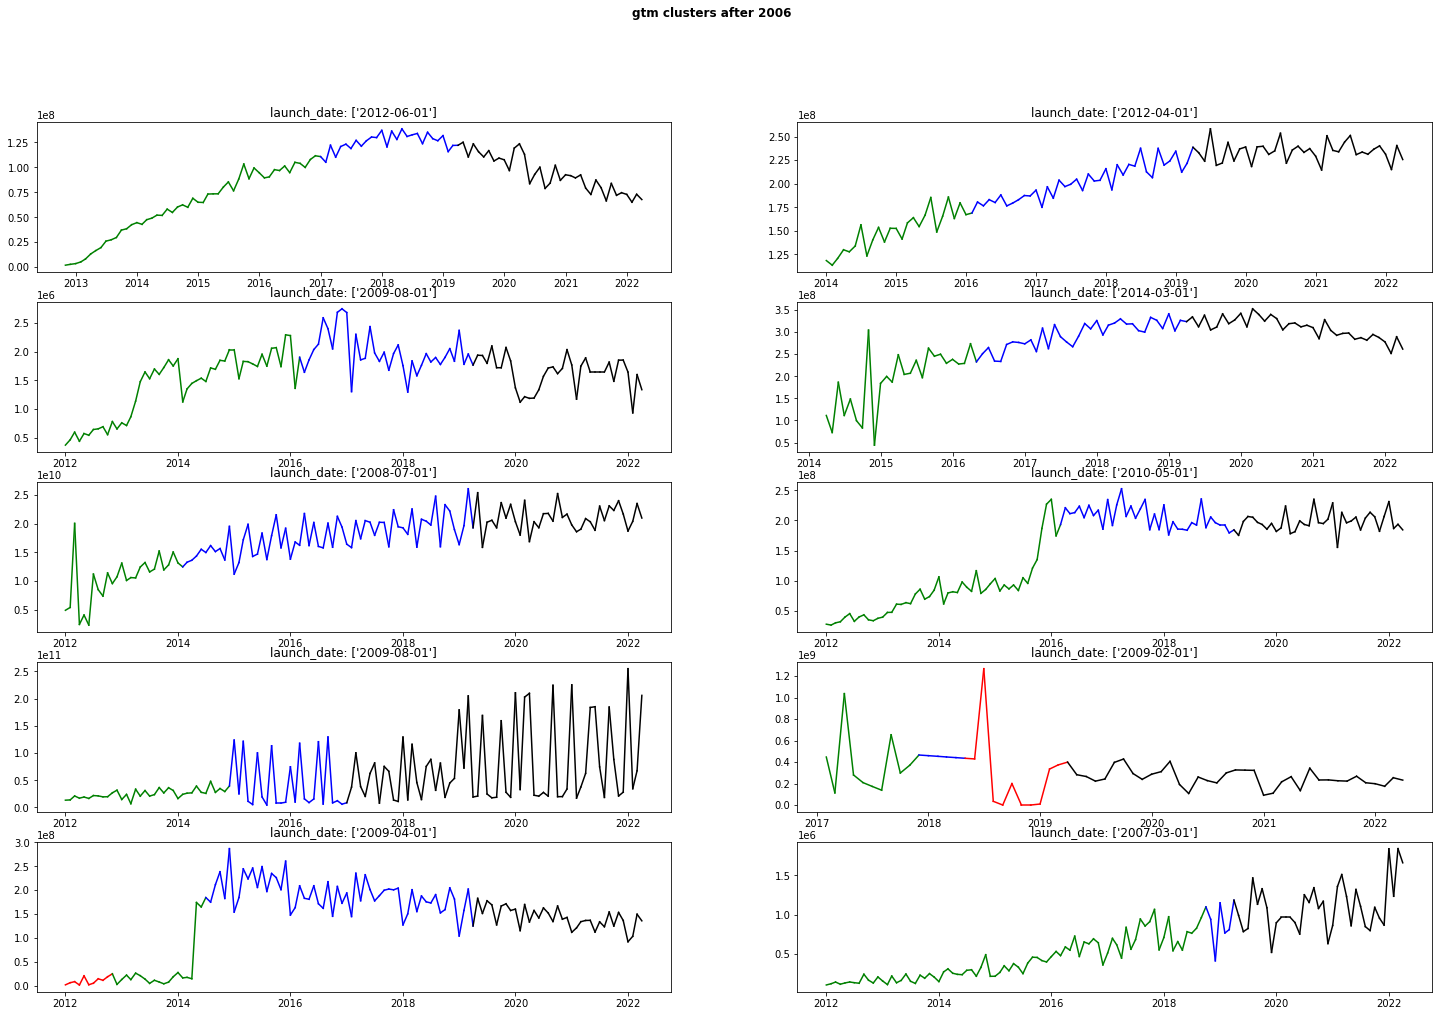

In [ ]:
fig,axes = plt.subplots(5,2,figsize=(25,16))
fig.suptitle('gtm clusters after 2006',fontweight ="bold")
print("Growth: Green")
print("Mature: blue")
print("Decline: red")
print("Missing: black")
for i in range(10):
    rand = random.randint(0,325)
    cluster = board[board['cluster_id']==gtm_ids_after[rand]].iloc[:,[3,4,7]].reset_index()
    launch_date = launch_df[launch_df['cluster_id']==gtm_ids_after[rand]].launch_date.values
    axes.flatten()[i].title.set_text(f'launch_date: {launch_date}')
    
    for idx, row in cluster.iterrows():
      if idx==len(cluster)-1:
          break    
      if row.stage_name =='Growth':
          color = 'green'
      elif row.stage_name =='Maturity':
          color = 'blue'
      elif row.stage_name =='Decline':
          color = 'red'
      else:
          color = 'black' # Stage Name missing
      sns.lineplot(x=[row.date, cluster.loc[idx + 1, 'date']], y=[row.volume, cluster.loc[idx + 1, 'volume']], color=color, ax=axes.flatten()[i])

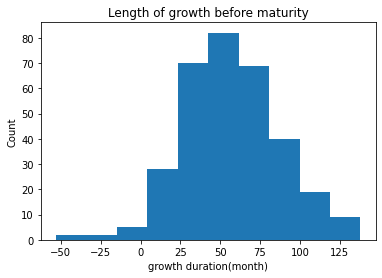



The average length of growth before maturity: 56.29754601226994
.


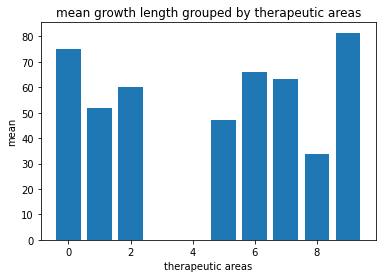

,mean,stds
ther_area_fact,,
0,74.916667,26.168886
1,51.947368,17.526732
2,60.257143,30.857311
5,47.000000,NaN
6,66.138889,18.417620
7,63.428571,20.188791
8,33.584416,22.869970
9,81.482759,39.103910


In [ ]:
# distribution of length of growth (in month) before maturity
# find the last month of growth
transition_date = board[(board['stage_name']=="Growth") & (board['cluster_id'].isin(gtm_ids_after))].iloc[:,[2,3,9]].sort_values('date').groupby("cluster_id").tail(1)
# join by cluster_id
merged_df = pd.merge(transition_date, gtm_launch_df_after.iloc[:,[2,3]], on=['cluster_id'])
# compute length of growth
merged_df['length'] = (pd.DatetimeIndex(merged_df['date']).year - pd.DatetimeIndex(merged_df['launch_date']).year)*12 + (pd.DatetimeIndex(merged_df['date']).month - pd.DatetimeIndex(merged_df['launch_date']).month)

plt.hist(merged_df['length'], 10, histtype ='bar')
plt.xlabel('growth duration(month)')
plt.ylabel('Count')
plt.title('Length of growth before maturity')
plt.show()

print('\n')
print('The average length of growth before maturity: {}\n.'.format(merged_df[['length']].mean()[0]))

# Mean length of growth before maturity grouped by therapeutic areas
means = merged_df.groupby('ther_area_fact').mean()
stds = merged_df.groupby('ther_area_fact').std()
stats = pd.merge(means, stds, on=['ther_area_fact'])
stats.columns = ['mean', 'stds']

plt.bar(stats.index, stats['mean'])
plt.xlabel('therapeutic areas')
plt.ylabel('mean')
plt.title('mean growth length grouped by therapeutic areas')
plt.show()
stats

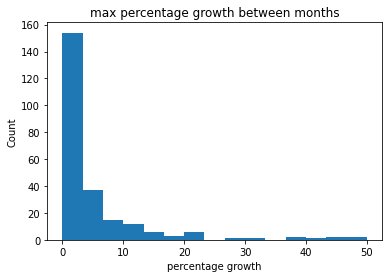

In [ ]:
# distribution of max percentage growth of volume before maturity
growth_df = board[(board['stage_name']=="Growth") & (board['cluster_id'].isin(gtm_ids_after))].iloc[:,[2,7]]
growth_df['perc_change'] = growth_df['volume'].pct_change()
max_growth_df = growth_df.groupby('cluster_id').max('perc_change')

plt.hist(max_growth_df['perc_change'],15, range=(0,50))
plt.xlabel('percentage growth')
plt.ylabel('Count')
plt.title('max percentage growth between months')
plt.show()

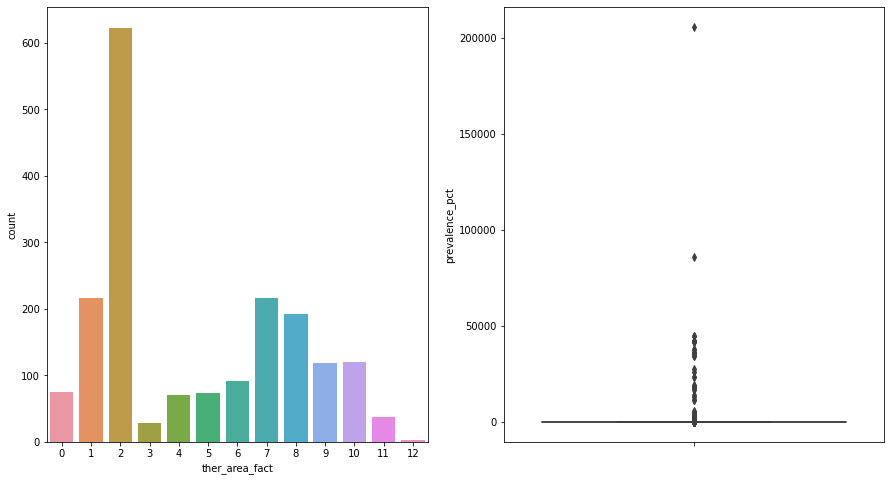

Median for prevalence_pct is -1.0
1628 rows have value -1


In [ ]:
#You can use this following chunk for EDA
board_agg = board.groupby("cluster_id")[["ther_area_fact","prevalence_pct"]].max().reset_index()

#Count of therapeutical area
fig,axes = plt.subplots(1,2,figsize=(15,8))
sns.countplot(data=board_agg,x="ther_area_fact",ax=axes[0])
sns.boxplot(data=board_agg,y="prevalence_pct",ax=axes[1])
plt.show()

print("Median for prevalence_pct is", np.median(board_agg.prevalence_pct))
#Most values for prevalnece pct is -1
print("{} rows have value -1".format(len(board_agg[board_agg.prevalence_pct == -1])))

Our timeseries have varing length.

### Competitors dataset

`cx_df`, which is the competitors dataset.

`Competitors Date`: Date entry of competitor. For a particular country-cluster (cluster_id) there can be
multiple competitors.

In [ ]:
cx_df.head()

,country,cluster_id,competitor_entry_date
0,country_4,ID_320,2014-09-01
1,country_35,ID_1202,2022-06-01
2,country_14,ID_1405,2021-11-01
3,country_14,ID_1405,2003-04-01
4,country_22,ID_1957,2007-02-01


In [ ]:
len(cx_df.cluster_id.unique())

656

Cluster_id in the competitors dataset is less than the main dataset, which means some cluster does not have competitor yet.

### Generics dataset

`dx_df`, which is the generics dataset, it records the data a drug exclusivity.

`Generics Date`: Date in which the drug loses the exclusivity, thus allowing the entry of generics. It is unique per each country-cluster.



In [ ]:
gx_df.head()

,country,cluster_id,gx_entry_date
0,country_14,ID_1358,2020-04-01
1,country_16,ID_1454,2020-09-01
2,country_28,ID_2294,2021-05-01
3,country_6,ID_477,2022-10-01
4,country_0,ID_5,2021-08-01


In [ ]:
#You can use this following chunk for EDA
len(gx_df.cluster_id.unique())

538

The same goes with generics dataset. TO DO: One thing I think we need to confirm is that if every id matches that in the center dataset.

### Launch dataset

`launch_df` contatins the launch data for drugs

`Launch Date`: Date of launch of the drug. As previously said, the same drug is not launched at the same time in every country, that’s why we reference it by country-cluster (cluster_id).

In [ ]:
launch_df.head()

,cluster_id,launch_date
0,ID_1,1977-09-01
1,ID_2,1991-11-01
2,ID_3,2004-08-01
3,ID_4,1999-08-01
4,ID_5,1998-02-01


In [ ]:
#You can use this following chunk for EDA
len(launch_df.cluster_id.unique())

2924

We have more clusters in the launch dataset.

### Below is Hang's Working Code


In [ ]:
def extract_county_digits(x):
  import re
  match = re.search('_\d+',x)
  start = match.start() + 1
  end = match.end()
  return x[start:end]

def loc_country_name(x):
  loc = country_digits.index(str(x))
  #country_digits[loc]
  return country_span[loc]

In [ ]:
country_span = board.country.unique()
ther_area_span = board.ther_area_fact.unique()
print(country_span)
print(ther_area_span)


country_digits = [extract_county_digits(x) for x in country_span]

['country_0' 'country_2' 'country_1' 'country_3' 'country_4' 'country_5'
 'country_6' 'country_37' 'country_7' 'country_8' 'country_9' 'country_10'
 'country_15' 'country_11' 'country_12' 'country_35' 'country_13'
 'country_14' 'country_16' 'country_17' 'country_18' 'country_20'
 'country_19' 'country_21' 'country_22' 'country_23' 'country_24'
 'country_26' 'country_25' 'country_28' 'country_27' 'country_29'
 'country_30' 'country_31' 'country_36' 'country_32' 'country_33'
 'country_39' 'country_40' 'country_38' 'country_42' 'country_41'
 'country_34']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [ ]:
# set segmentation
ther_area = 0
country = 10
## transform to country name
loc_country_name(country)
### segment data accordingly
data = board[(board['ther_area_fact'] == ther_area) & (board['country'] == loc_country_name(country))]
data.head()

,country,cluster,cluster_id,date,stage_name,stage_name_lag_1,stage_id_cumsum,volume,business_unit,ther_area_fact,prevalence_pct
48742,country_10,brand_25,ID_827,2014-01-01,PostGx_Growth,No_Stage,0.0,8.302710e+07,ONE,0,-1.0
48743,country_10,brand_25,ID_827,2014-02-01,PostGx_Growth,No_Stage,0.0,2.075678e+08,ONE,0,-1.0
48744,country_10,brand_25,ID_827,2014-03-01,PostGx_Growth,No_Stage,0.0,3.321084e+08,ONE,0,-1.0
48745,country_10,brand_25,ID_827,2014-04-01,PostGx_Growth,No_Stage,0.0,7.472439e+07,ONE,0,-1.0
48746,country_10,brand_25,ID_827,2014-05-01,PostGx_Growth,No_Stage,0.0,4.151355e+07,ONE,0,-1.0


In [ ]:
def plot_data(ther_area = 0, country = 0, data = board):
  data = board[(board['ther_area_fact'] == ther_area) & (board['country'] == loc_country_name(country))]  
  data['transition'] = data.groupby(['cluster_id','stage_name','stage_name_lag_1'])['date'].rank(method='first')
  transitions = data[data.transition == 1].iloc[:,[2,3,4,5]]
  ids = data.cluster_id.unique()
  # below is graphing
  col=5
  row=4
  fig,axes = plt.subplots(row,col,figsize=(10,5))
  a = min(10, len(ids))
  b = [-1]
  for i in range(col*row):
    rand = -1
    while (rand in b) and (len(b)-1 < len(ids)) : # avoids repeated graph 
      rand = random.randint(0,len(ids) - 1)
    else:
      if len(b)-1 < len(ids):
        b.append(rand)
        cluster = board[board['cluster_id']==ids[rand]].iloc[:,[3,4,7]]
        sns.lineplot(x='date',y='volume',hue='stage_name', data=cluster,ax=axes.flatten()[i])
        axes.flatten()[i].get_legend().remove()
  print("Ther_area: ", ther_area, ". Country: ", country, ". Number of ids: ", len(ids))
# Need to use row_number to get the transition time and label it in the graph

In [ ]:
board.groupby(['country','ther_area_fact'])['cluster_id'].count()

country    ther_area_fact
country_0  0                  310
           1                  496
           2                 1690
           3                  124
           4                  124
                             ... 
country_9  7                  434
           8                  320
           9                  198
           10                 583
           11                  75
Name: cluster_id, Length: 465, dtype: int64

In [ ]:
plot_data(ther_area = 2, country = 0)

Ther_area:  2 . Country:  0 . Number of ids:  16


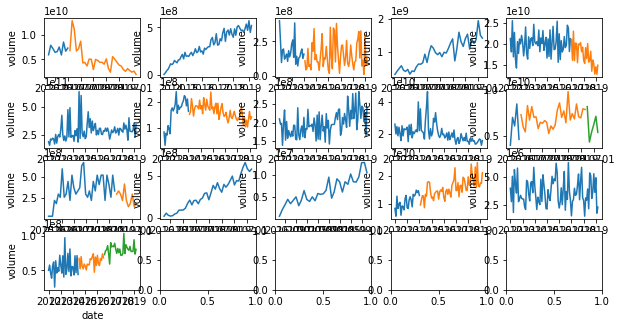

In [ ]:
plot_data(ther_area = 2, country = 0)

* Now the trend looks similar within the same ther_area and country. 
* Need to label the transition point to get a vision idea of where the transition happened


In [ ]:
# set segmentation
ther_area = 2
country = 0
## transform to country name
loc_country_name(country)
### segment data accordingly
data = board[(board['ther_area_fact'] == ther_area) & (board['country'] == loc_country_name(country))]
data['transition'] = data.groupby(['cluster_id','stage_name','stage_name_lag_1'])['date'].rank(method='first')

transitions = data[data.transition == 1].iloc[:,[2,3,4,5]]
transitions[(transitions.stage_name == 'PostGx_Maturity') & (transitions.stage_name_lag_1 == 'PostGx_Growth')]
#transitions[(transitions.stage_name == 'PostGx_Maturity') & (transitions.stage_name_lag_1 == 'PostGx_Maturity')]
data.head(10)


,country,cluster,cluster_id,date,stage_name,stage_name_lag_1,stage_id_cumsum,volume,business_unit,ther_area_fact,prevalence_pct,transition
372,country_0,brand_49,ID_5,2012-01-01,Maturity,No_Stage,0.0,2.101001e+08,ONE,2,-1.0,1.0
373,country_0,brand_49,ID_5,2012-02-01,Maturity,No_Stage,0.0,1.954043e+08,ONE,2,-1.0,2.0
374,country_0,brand_49,ID_5,2012-03-01,Maturity,No_Stage,0.0,1.980196e+08,ONE,2,-1.0,3.0
375,country_0,brand_49,ID_5,2012-04-01,Maturity,No_Stage,0.0,1.382401e+08,ONE,2,-1.0,4.0
376,country_0,brand_49,ID_5,2012-05-01,Maturity,No_Stage,0.0,1.971479e+08,ONE,2,-1.0,5.0
377,country_0,brand_49,ID_5,2012-06-01,Maturity,No_Stage,0.0,2.343855e+08,ONE,2,-1.0,6.0
378,country_0,brand_49,ID_5,2012-07-01,Maturity,No_Stage,0.0,1.523962e+08,ONE,2,-1.0,7.0
379,country_0,brand_49,ID_5,2012-08-01,Maturity,No_Stage,0.0,2.028767e+08,ONE,2,-1.0,8.0
380,country_0,brand_49,ID_5,2012-09-01,Maturity,No_Stage,0.0,1.575439e+08,ONE,2,-1.0,9.0
381,country_0,brand_49,ID_5,2012-10-01,Maturity,No_Stage,0.0,1.783422e+08,ONE,2,-1.0,10.0


In [ ]:
board.stage_name.unique()

array(['PostGx_Growth', 'PostGx_Maturity', 'PostGx_Decline', nan,
       'Maturity', 'Decline', 'Second_Growth', 'Second_Maturity',
       'Growth', 'Lead_in_Maturity', 'Lead_in_Decline'], dtype=object)

In [ ]:

a = transitions[(transitions.stage_name == 'PostGx_Maturity') & (transitions.stage_name_lag_1 == 'PostGx_Growth')]
a.dates[post_g_to_m.cluster_id == 'ID_5']

AttributeError: ignored

In [ ]:
if transitions.date[transitions.cluster_id == 'ID_0'].any():
  print("Not Empty")
else:
  print("Empty")

Empty


In [ ]:
 post_g_to_m = transitions[(transitions.stage_name == 'PostGx_Maturity') & (transitions.stage_name_lag_1 == 'PostGx_Growth')]

,cluster_id,date,stage_name,stage_name_lag_1
48747,ID_827,2014-06-01,PostGx_Maturity,PostGx_Growth


In [ ]:
transitions

,cluster_id,date,stage_name,stage_name_lag_1
372,ID_5,2012-01-01,Maturity,No_Stage
459,ID_5,2019-04-01,NaN,NaN
744,ID_8,2012-01-01,Maturity,No_Stage
868,ID_9,2012-01-01,Maturity,No_Stage
928,ID_9,2017-01-01,Decline,Maturity
992,ID_11,2012-01-01,Maturity,No_Stage
1240,ID_13,2012-01-01,PostGx_Decline,No_Stage
1265,ID_13,2014-02-01,PostGx_Maturity,PostGx_Decline
1488,ID_15,2012-01-01,PostGx_Maturity,No_Stage
1736,ID_17,2012-01-01,Maturity,No_Stage


In [ ]:
transitions[(transitions.cluster_id in ['ID_8','ID_26'])]

ValueError: ignored

In [ ]:
data['transition'] = board.groupby(['cluster_id','stage_name','stage_name_lag_1'])['date'].rank(method='first')
transitions = data[data.transition == 1].iloc[:,[2,3,4,5]]
transitions.head()

,cluster_id,date,stage_name,stage_name_lag_1
48742,ID_827,2014-01-01,PostGx_Growth,No_Stage
48747,ID_827,2014-06-01,PostGx_Maturity,PostGx_Growth
52502,ID_889,2014-01-01,Maturity,No_Stage
52559,ID_889,2018-10-01,Second_Growth,Maturity


In [ ]:
transitions[(transitions.stage_name == 'PostGx_Maturity') & (transitions.stage_name_lag_1 == 'PostGx_Growth')]

- distance from competitor entry

- distance since competitor

- months since brand was launched 

- distance from last indication

- distance until next indication

- create variables from stages
